# **Projeto Capstone: Sugestões baseadas em dados para o RH**

## Descrição:
Este projeto de exemplo no qual analiso um conjunto de dados e construo modelos preditivos para fornecer insights ao departamento de Recursos Humanos(HR) da empresa Salifort Motors.


In [1]:
# Importando pacotes
!pip install seaborn
!pip install xgboost
!pip install scikit-learn 

In [2]:
# Importando pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem de dados
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#  Métricas e funções úteis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Salvar modelos
import pickle

In [3]:
# Exibir todas as colunas em quadros de dados
pd.set_option('display.max_columns', None)

In [4]:
# Carregar o conjunto de dados
df0 = pd.read_csv("HR.csv")

# Exibir df
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Informações básicas
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Estatística descritivas df
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Nomes de todas as colunas
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Renomeando colunas
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
# Verificação de valores ausentes
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
# Verificação de duplicados
df0.duplicated().sum()

np.int64(3008)

In [11]:
# Inspeccionar linhas duplicadas 
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Remover as duplicatas e salva o df resultante em uma nova variável mantendo a primeira instância duplicadas
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Verificação de Outliers

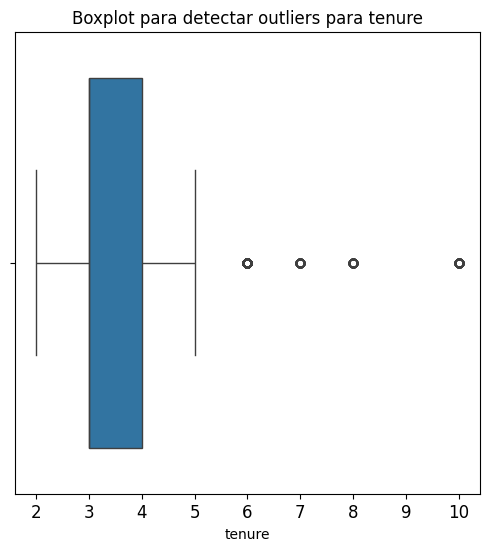

In [13]:
# Visualização da distribuição de `tenure` e detectar quaisquer outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot para detectar outliers para tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [14]:
# Determinar o número de linhas contendo outliers 
# Calcular o valor do 25º percentil em 'tenure' 
percentile25 = df1['tenure'].quantile(0.25)
print("Percentil 25: ", percentile25)

# Calcule o valor do 75º percentil em 'tenure'
percentile75 = df1['tenure'].quantile(0.75)
print("Percentil 75: ", percentile75)

# Calcular o intervalo interquartil em 'tenure'
iqr = percentile75 - percentile25
print("IQR: ", iqr)

# Limite superior e limite inferior para valores não discrepantes em 'tenure'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Limite inferior: ", lower_limit)
print("Limite superior: ", upper_limit)

# Identificar subconjunto de dados contendo valores discrepantes em 'tenure'
outliers = df1 [(df1['tenure'] > upper_limit) | (df1 ['tenure'] < lower_limit)]

# Quantas linhas dos dados contêm valores discrepantes em 'tenure'
print("Número de linhas nos dados contendo outliers em 'tenure': ", len(outliers))

Percentil 25:  3.0
Percentil 75:  4.0
IQR:  1.0
Limite inferior:  1.5
Limite superior:  5.5
Número de linhas nos dados contendo outliers em 'tenure':  824


## Exploração de dados - EDA

In [15]:
# Obter o número de pessoas que saíram vs as que ficaram
print(df1['left'].value_counts())

# Porcentagem de pessoas que saíram vs as que ficaram
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


## Visualização dos Dados

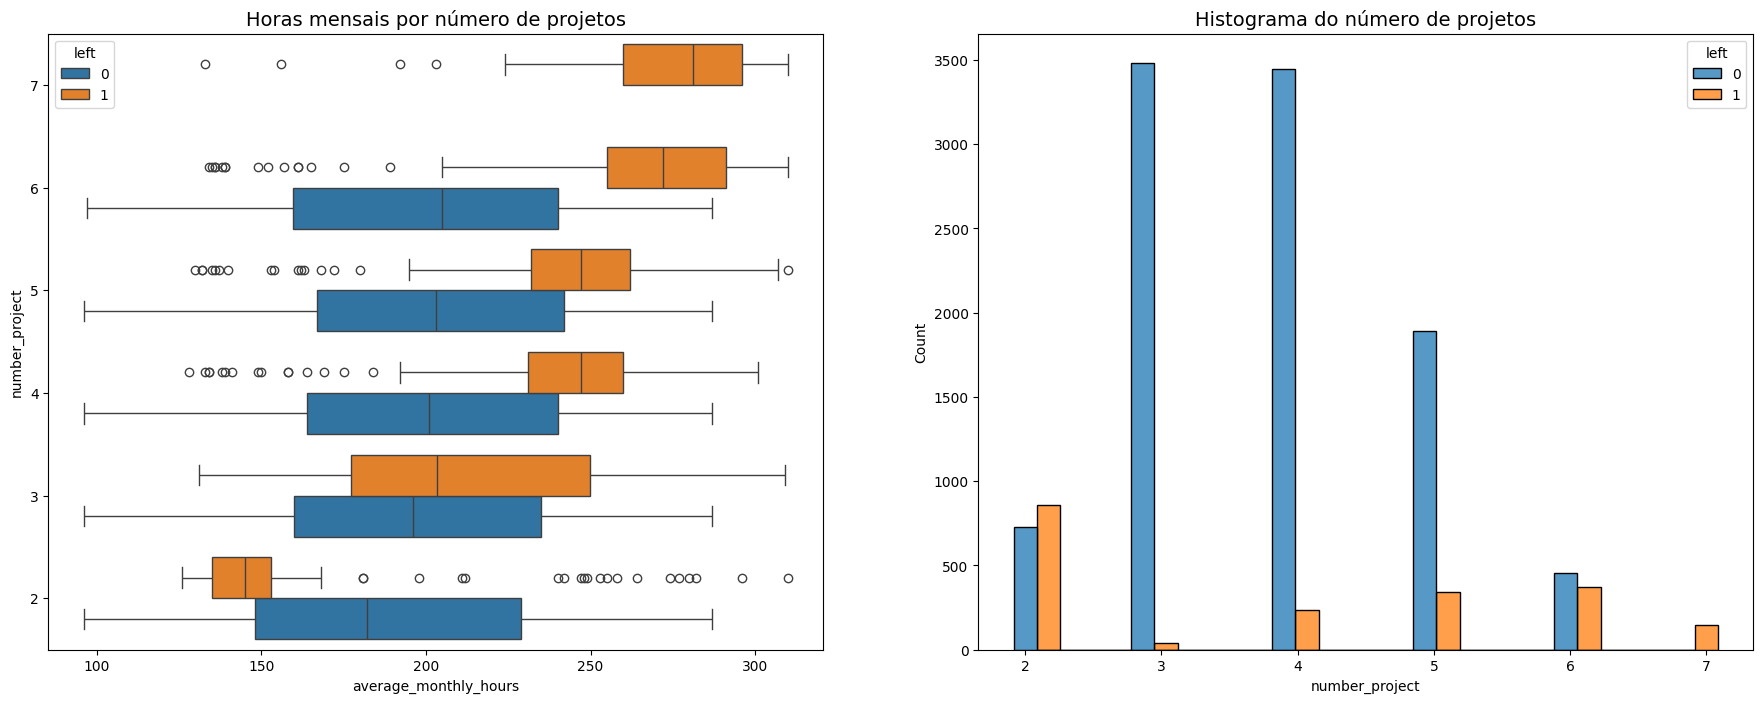

In [16]:
# Definir figura e eixos
fig, ax = plt.subplots(1,2, figsize = (22,8))

# boxplot mostrando as distribuições de `average_monthly_hours` para `number_project`, comparando os funcionários que ficaram e os que saíram
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Horas mensais por número de projetos', fontsize='14')

# Histograma mostrando a distribuição de `number_project`, comparando os funcionários que ficaram e os que saíram
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histograma do número de projetos', fontsize='14')

# Exibir gráficos
plt.show()

In [17]:
# Obter contagens de valores de permanência/saída para funcionários com 7 projetos
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Text(0.5, 1.0, 'Horas mensais por pontuação da última avaliação')

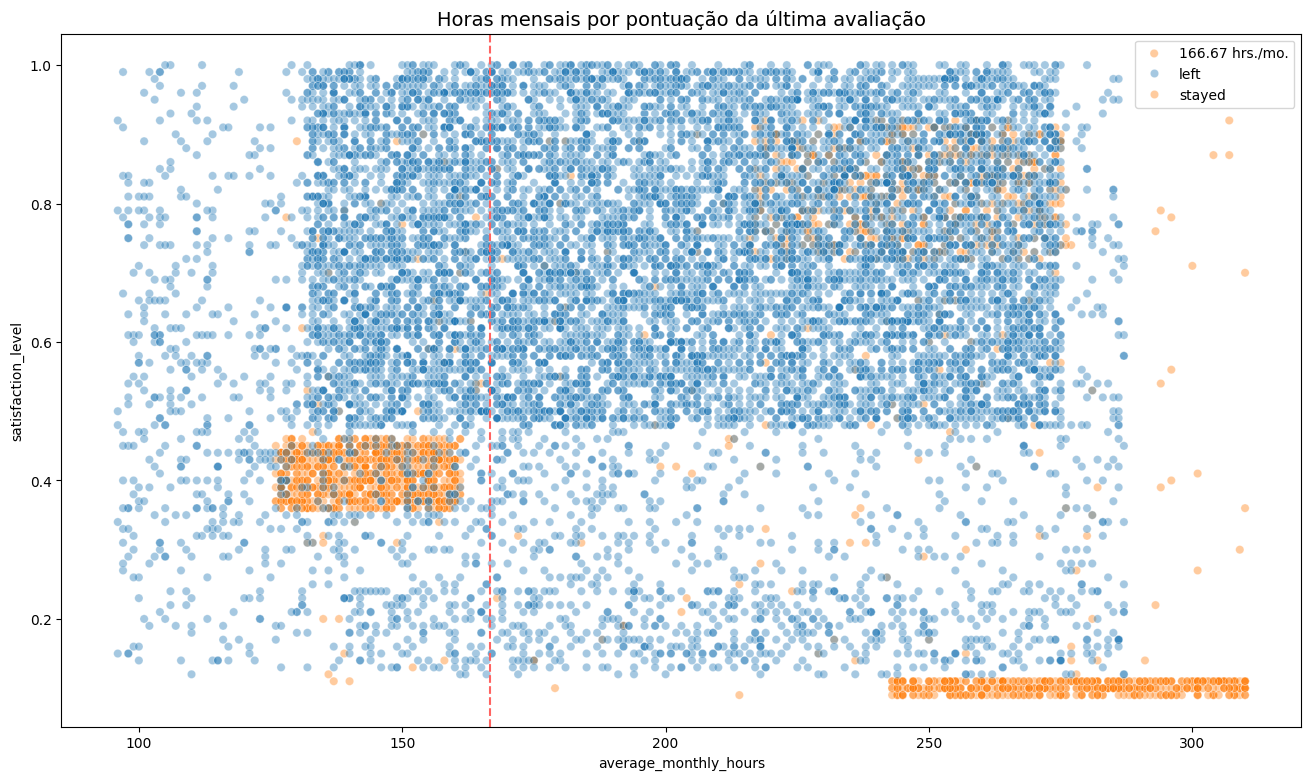

In [18]:
# Gráfico de dispersão de `average_monthly_hours` versus `satisfaction_level`, comparando os funcionários que ficaram e os que saíram
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Horas mensais por pontuação da última avaliação', fontsize='14')

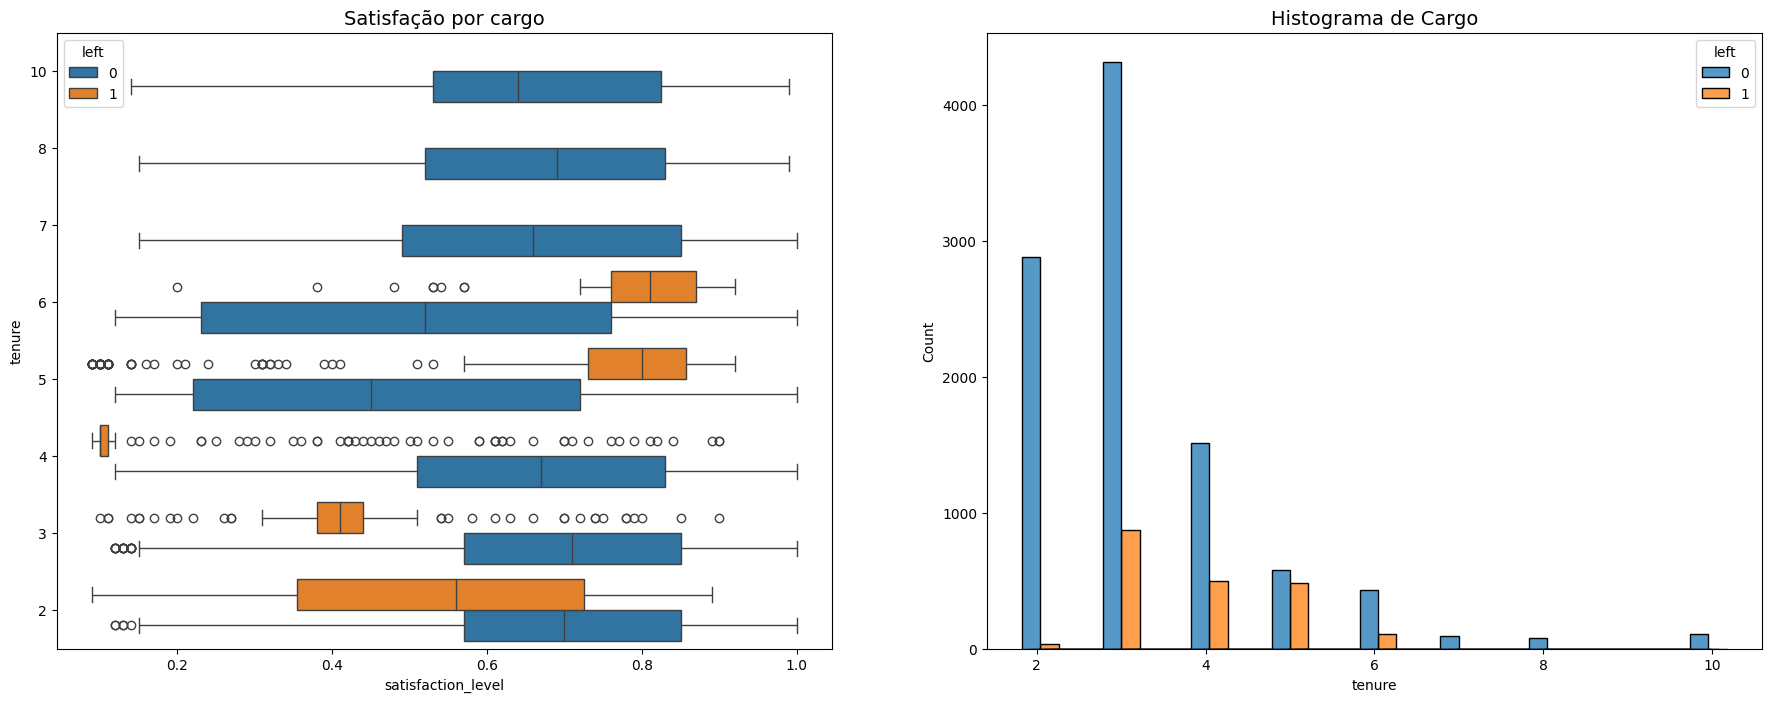

In [19]:
# Definir figura e eixos
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Boxplot mostrando as distribuições de `satisfaction_level` por tempo de serviço, comparando os funcionários que ficaram com os que saíram
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfação por cargo', fontsize='14')

# Histograma que mostra a distribuição de “permanência”, comparando os funcionários que ficaram e os que saíram
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histograma de Cargo', fontsize='14')

plt.show()

In [20]:
# Calculo a média e a mediana dos escores de satisfação dos funcionários que saíram e dos que ficaram
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

/tmp/ipykernel_34879/670554611.py:2: FutureWarning: The provided callable <function mean at 0x75829c57fce0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
/tmp/ipykernel_34879/670554611.py:2: FutureWarning: The provided callable <function median at 0x75829c4d58a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


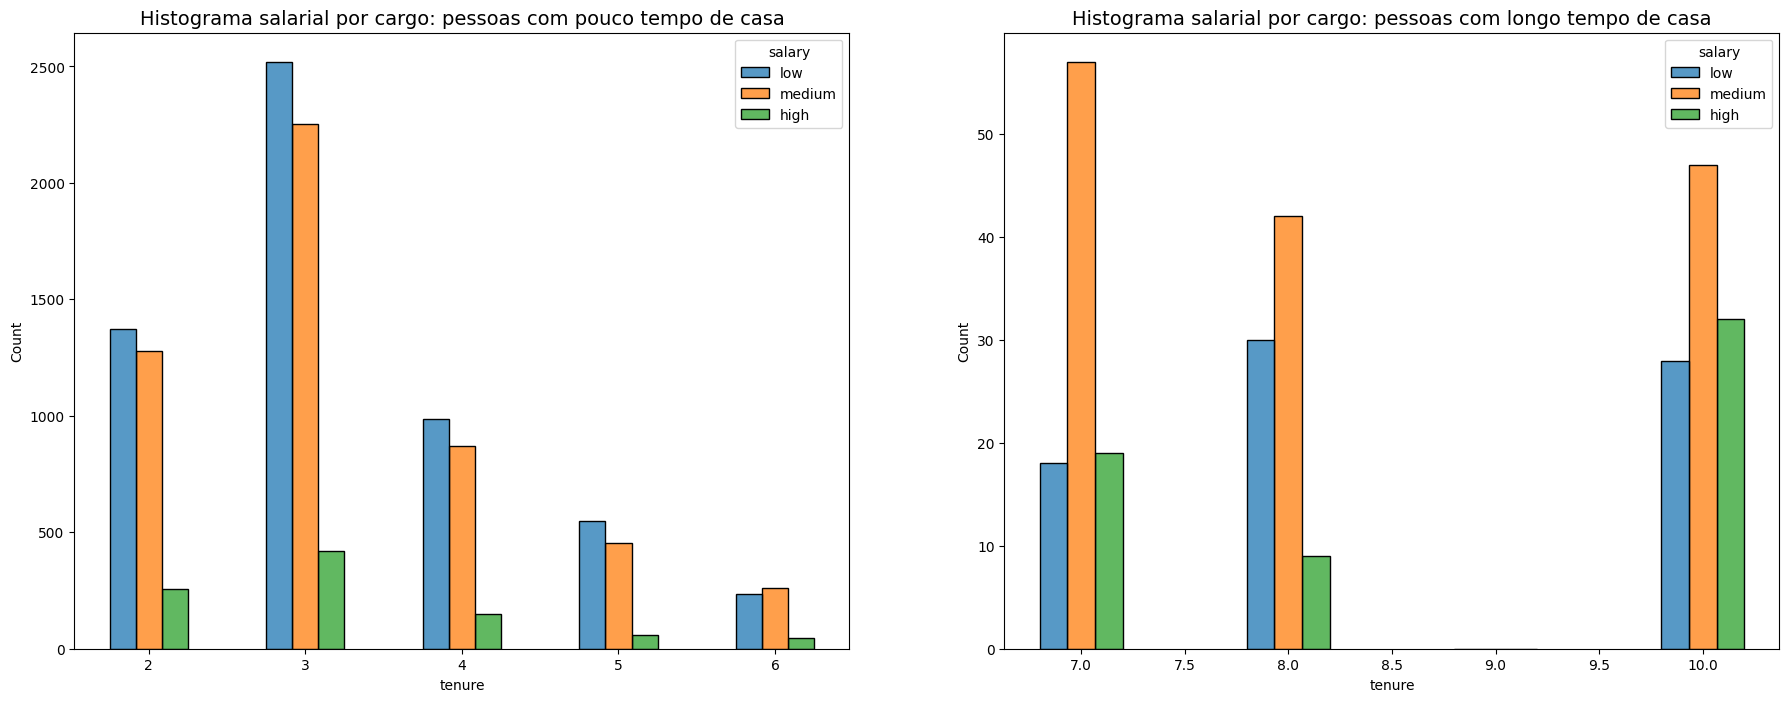

In [21]:
# Definir figura e eixos
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Funcionários com contrato de curta duração
tenure_short = df1[df1['tenure'] < 7]

# Definir funcionários com longo tempo de casa
tenure_long = df1[df1['tenure'] > 6]

# Histograma de contratos de curta duração
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Histograma salarial por cargo: pessoas com pouco tempo de casa', fontsize='14')

# Histograma de tempo de permanência
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Histograma salarial por cargo: pessoas com longo tempo de casa', fontsize='14');

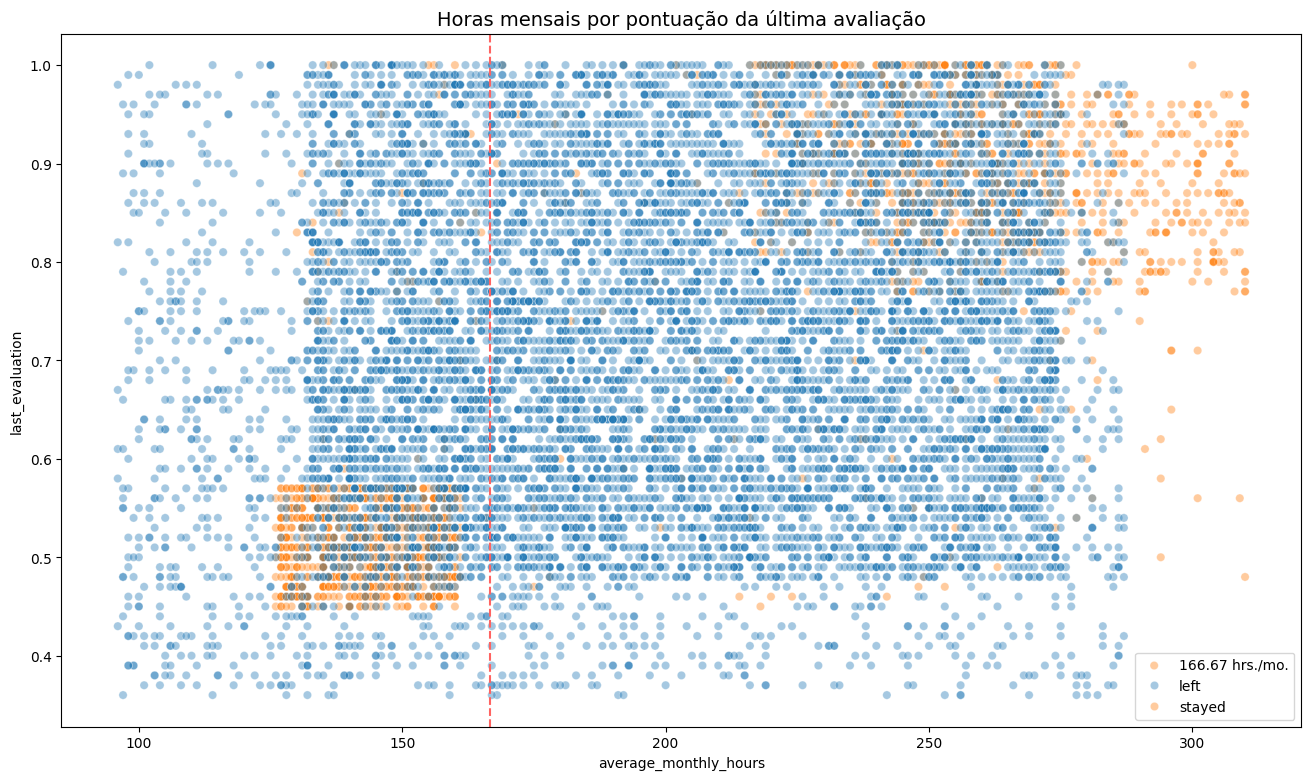

In [22]:
# Gráfico de dispersão de 'média_horas mensais' versus 'última_avaliação'
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Horas mensais por pontuação da última avaliação', fontsize='14');

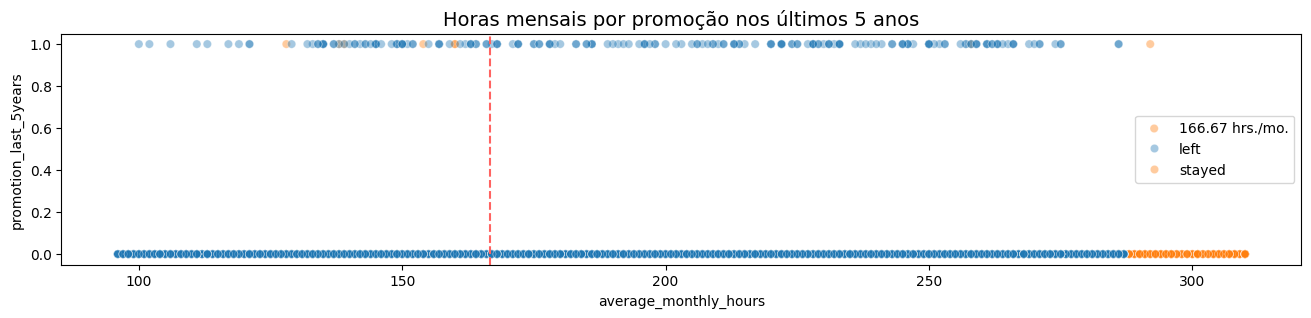

In [23]:
# Gráfico para examinar a relação entre 'average_monthly_hours' e 'promotion_last_5years'
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Horas mensais por promoção nos últimos 5 anos', fontsize='14');

In [24]:
# Exibir contagens para cada departamento
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

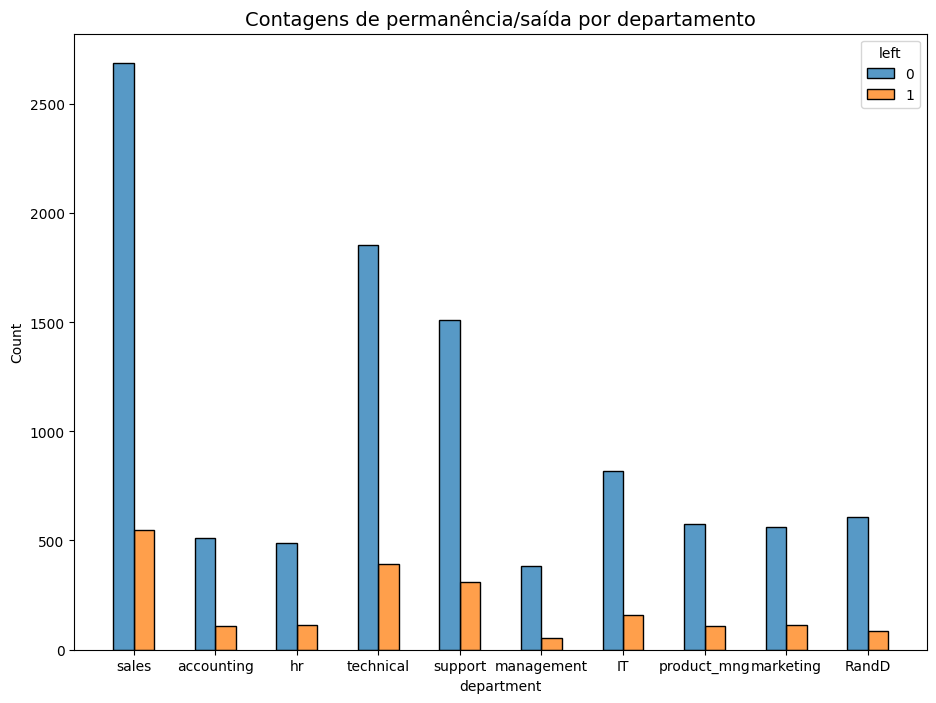

In [25]:
# Histograma para comparar a distribuição de departamentos dos funcionários que saíram com a dos funcionários que não saíram
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Contagens de permanência/saída por departamento', fontsize=14);

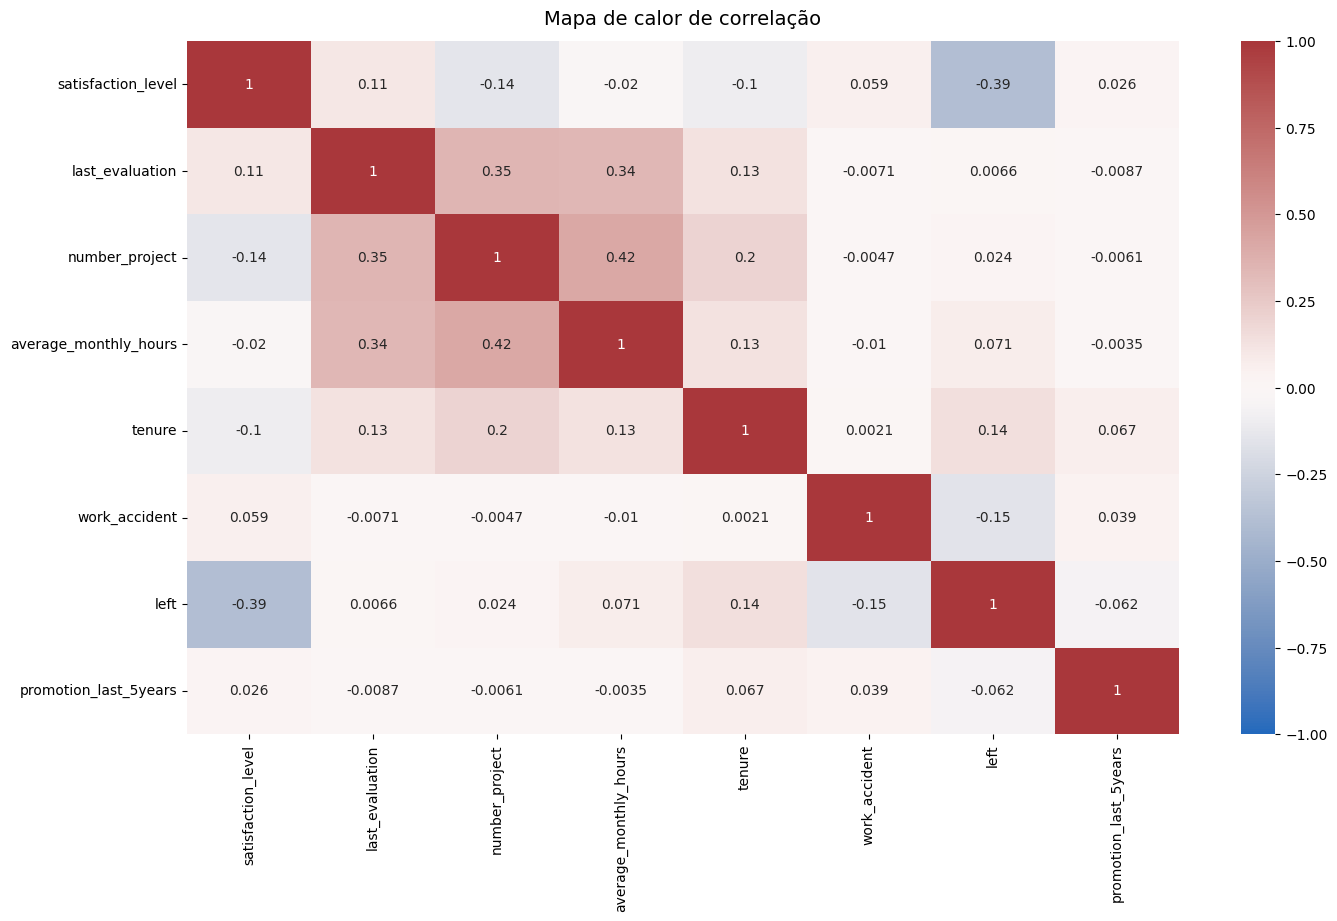

In [26]:
# Remove a coluna em formato string do df
df_numeric = df0.drop(columns=['department','salary'])

# Mapa de calor de correlação
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Mapa de calor de correlação', fontdict={'fontsize':14}, pad=12)
plt.show()

## Modelo Regressão Logística

In [27]:
# Regressão Logística
df_enc = df1.copy()


# Codifica `salary` como número ordinal
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Codifica 'department' como dummies
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


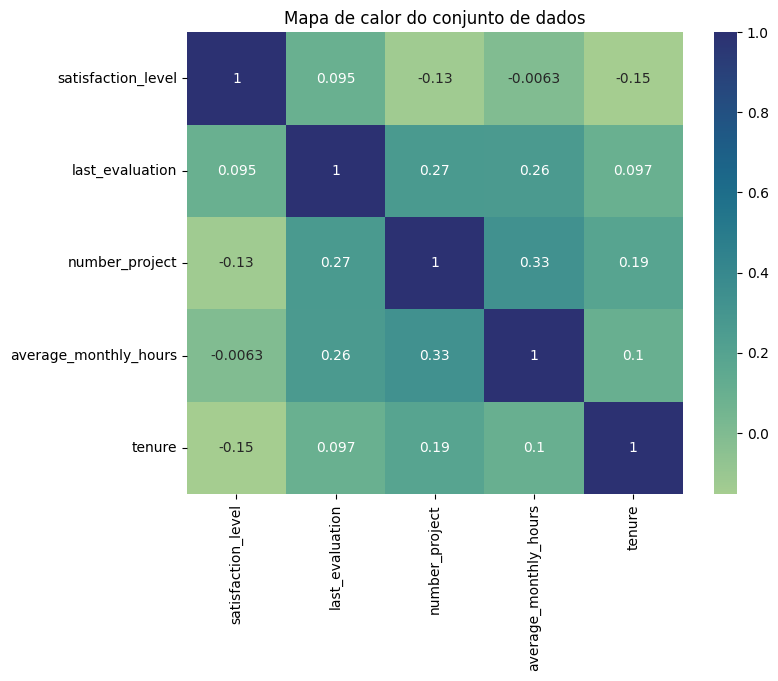

In [28]:
# Mapa de calor para visualizar como as variáveis estão correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Mapa de calor do conjunto de dados')
plt.show()

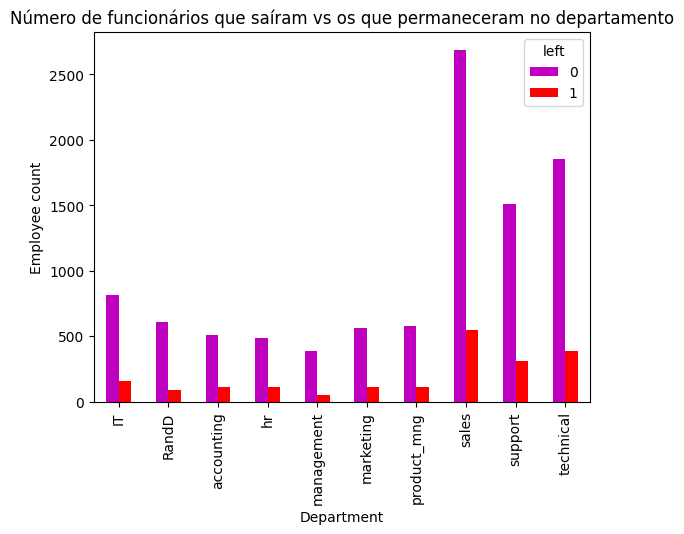

In [29]:
# Gráfico de barras para visualizar o número de funcionários em cada departamento, comparando os que saíram com os que não saíram
# Na legenda, 0 (cor roxa) funcionários que não saíram, 1 (cor vermelha) funcionários que saíram
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Número de funcionários que saíram vs os que permaneceram no departamento')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [30]:
# Selecionar as linhas sem outliers em `tenure` e salva o df resultante em uma nova variável
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Exibir as primeiras linhas do novo df
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [31]:
# Isolar a variável de resultado
y = df_logreg['left']

# Exibir as primeiras linhas da variável de resultado
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [32]:
# Selecionar recursos para o modelo
X = df_logreg.drop('left', axis=1)

# Exibe as primeiras linhas dos recursos selecionados
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [33]:
# Divide os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [34]:
# Construção do modelo de regressão logística e ajuste ao conjunto de dados de treinamento
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

/home/monica/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Modelo de regressão logística
y_pred = log_clf.predict(X_test)

In [ ]:
# Calcular valores para a matriz de confusão
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Criar exibição da matriz de confusão
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Gráfico de matriz de confusão
log_disp.plot(values_format='')

plt.show()

In [ ]:
df_logreg['left'].value_counts(normalize=True)

In [ ]:
# Cria um relatório de classificação para o modelo de regressão logística
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

## Abordagem de modelagem B: modelo baseado em árvore

In [ ]:
# Isolar a variável de resultado
y = df_enc['left']

# Exibir as primeiras linhas de `y`
y.head()

In [ ]:
# Selecione os recursos
X = df_enc.drop('left', axis=1)

# Exibir as primeiras linhas de `X`
X.head()

In [ ]:
# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## Árvore de decisão - 1ª rodada

In [ ]:
# Instanciar o modelo
tree = DecisionTreeClassifier(random_state=0)

# Atribuir um dicionário de hiperparâmetros para pesquisar
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Atribuir um dicionário de métricas de pontuação para capturar
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciar o GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_train, y_train)

In [ ]:
# Verifica os melhores parâmetros
tree1.best_params_

In [ ]:
# Verifica a melhor pontuação AUC no CV
tree1.best_score_

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Cria um dicionário que mapeie a métrica de entrada para o nome da métrica real no GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Obter todos os resultados do CV e coloca em um df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isola a linha do df com a pontuação máxima (métrica)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extrai as pontuações Accuracy, precision, recall e f1 dessa linha
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Cria uma tabela de resultados
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [ ]:
# Obtem todas as pontuações do CV
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

## Random Forest - 1ª rodada

In [ ]:
# Instanciar o modelo
rf = RandomForestClassifier(random_state=0)

# Atribui um dicionário de hiperparâmetros para pesquisar
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Atribui um dicionário de métricas de pontuação para captura
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciar o GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

In [ ]:
# Define um caminho para a pasta onde salvar o modelo
path = '/home/jovyan/work/'

In [ ]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
# Escrever pickle
write_pickle(path, rf1, 'hr_rf1')

In [ ]:
# Ler pickle
rf1 = read_pickle(path, 'hr_rf1')

In [ ]:
# Verifica a melhor pontuação AUC no CV
rf1.best_score_

In [ ]:
# Verifica best params
rf1.best_params_

In [ ]:
# Obtem todas as pontuações do CV
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [ ]:
# Obtem previsões em dados de teste
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

In [ ]:
# Elimina `satisfaction_level` e salva o df resultante em uma nova variável
df2 = df_enc.drop('satisfaction_level', axis=1)

# Exibe as primeiras linhas do novo df
df2.head()

In [ ]:
# Cria a coluna “overworked”. Idêntificando à média de horas mensais.
df2['overworked'] = df2['average_monthly_hours']

# Inspeciona os valores médios mensais máximos e mínimos de horas
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

In [ ]:
# Define “overworked” como trabalho > 175 horas/semana
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Exibe as primeiras linhas da nova coluna
df2['overworked'].head()

In [ ]:
# Elimina a coluna `average_monthly_hours`.
df2 = df2.drop('average_monthly_hours', axis=1)

# Exibe as primeiras linhas do df
df2.head()

In [ ]:
# Isola a variável de resultado
y = df2['left']

# Seleciona os recursos
X = df2.drop('left', axis=1)

In [ ]:
# Criar dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## Árvore de decisão - 2ª rodada

In [ ]:
# Instanciar o modelo
tree = DecisionTreeClassifier(random_state=0)

# Atribui um dicionário de hiperparâmetros para pesquisar
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Atribui um dicionário de métricas de pontuação para capturar
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciar GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree2.fit(X_train, y_train)

In [ ]:
# Verifica best params
tree2.best_params_

In [ ]:
# Verifica a melhor pontuação AUC e CV
tree2.best_score_

In [ ]:
# Obtem todas as pontuações do CV
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

## Random Forest - 2ª rodada

In [ ]:
# Instancia o modelo
rf = RandomForestClassifier(random_state=0)

# Atribui um dicionário de hiperparâmetros para pesquisar
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Atribui um dicionário de métricas de pontuação para captura
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instanciar GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

In [ ]:
# Escrevendo pickle
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
# Le in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
# Verifica best params
rf2.best_params_

In [ ]:
# Verifica best AUC score e CV
rf2.best_score_

In [ ]:
# Obtem todas as pontuações do CV
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

In [ ]:
# Obtem previsões em dados de teste
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

In [ ]:
# Gera uma matriz de valores para a matriz de confusão
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

## Divisão da Árvore de Decisão

In [ ]:
# Plotar a árvore
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## Árvore de Decisão feature importance

In [ ]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Extrair apenas os recursos importantes > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

In [ ]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

## Random Forest feature importance

In [ ]:
# Obter a importância dos recursos
feat_impt = rf2.best_estimator_.feature_importances_

# Obter índices dos 10 principais recursos
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Obter rótulos de coluna dos 10 principais recursos
feat = X.columns[ind]

# Filtro `feat_impt` para consistir nas 10 principais importâncias de recursos
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()